# PhotoFiTT: Analysis of manually annotated unsynchronised cell populations


- The code reads `.tif` videos, where a dot is used to mark a cell undergoing premitotic rounding. This dot is placed in the middle of the cell across time for the same cell.  If the cell divides, two dots (one for each cell) with the same label are placed as in the previous frames. Once the cell goes into interphase (it is not rounded anymore), the labels stop. This way, we identify divisions and premitotic rounding tracks.
## Data structure:
- Data has to be organised in folders by `replica > illumination condition > light dose`. Alternatively, one could have it for other conditions such as `replica > drug > concentration`. Check the schema as follows.
- Each hierarchical level in the data is encoded as `"Subcategory-XX"` in the code. The Subcategories are used to display the data analysis results. The labels will be identical to the folder name, so the same conditions should always have the same folder name. For example `WL 475 light` folder name for the folders containing data illuminated with a wavelength of 475 nm in replicas 1 and 2. This applies to all the hierarchical levels.
- Alternatively, one could rename these columns using the `pandas dataframe` functionalities in the code.

   ```   
   -Raw-images (folder)
    |
    |--Biological-replica-date-1 [Subcategory-00]
        |
        |--Cell density / UV Light / WL 475 light [Subcategory-01] 
           |
           |-- control-condition (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
           |
           |-- condition1 (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
           |
           |-- condition2 (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
        |
        |--Cell density / UV Light / WL 475 light [Subcategory-01]
        ...
   ```

## 1. Import required dependencies

In [1]:
import photofitt
from photofitt.analysis import unsynchro
from photofitt import display
import pandas as pd
import os

## 2. Set the paths to the data and the output folders
- `path2images`: The path where the Raw-images are saved. Equivalent to "Masks (folder)" in our hierarchy. This folder should contain all the biological replicas and subsequent folders. For example "/home/ocb/HardDrive_4TB/PHX/SYNCHRO/Raw-images"
- `path2results`: The path where the notebook will save all the results. Once the cell activity is calculated, a CSV file together with the plots will be stored there.
- `frame_rate`: The time frame in the videos given in minutes (e.g., one frame every 4 minutes equals `frame_rate = 4`)

In [2]:
path2masks = ""
path2results = ""
frame_rate = 4

## Prepare the directory to save the results
os.makedirs(path2results, exist_ok=True)
os.makedirs(os.path.join(path2results, "plots"), exist_ok=True)

## 3. Extract the information from the tracked files

In [3]:
data = unsynchro.read_tracking(path2masks, frame_rate = 4)
data.to_csv(os.path.join(path2results, "manual_mitosis_counting.csv"))
print(f"A CSV file with the information about cell mitosis and arrest is stored in:")
print(f"{os.path.join(path2results, 'manual_mitosis_counting.csv')}")

20230706_unsync_UV_day
WL UV - high density
0.6 jcm2
CHO_UV_live-01-Scene-34-P3-A04.tif
CHO_UV_live-01-Scene-33-P10-A04.tif
CHO_UV_live-01-Scene-32-P8-A04.tif
0 jcm2
CHO_UV_live-01-Scene-02-P10-A01.tif
CHO_UV_live-01-Scene-06-P5-A01.tif
CHO_UV_live-01-Scene-01-P6-A01.tif
20230628_unsync_UV_night
WL UV - high density
60 jcm2
CHO_unsync_UV-live-01-Scene-34-P2-A04.tif
CHO_unsync_UV-live-01-Scene-33-P3-A04.tif
CHO_unsync_UV-live-01-Scene-31-P6-A04.tif
6 jcm2
CHO_unsync_UV-live-01-Scene-12-P3-A02.tif
CHO_unsync_UV-live-01-Scene-18-P9-A02.tif
CHO_unsync_UV-live-01-Scene-13-P2-A02.tif
0 jcm2
CHO_unsync_UV-live-01-Scene-02-P9-A01.tif
20230524_UV_unsync_night
WL UV - high density
0.6 jcm2
CHO_unsync_UV-live-01-Scene-35-P4-A04.tif
CHO_unsync_UV-live-01-Scene-32-P8-A04.tif
CHO_unsync_UV-live-01-Scene-33-P6-A04.tif
0 jcm2
CHO_unsync_UV-live-01-Scene-08-P5-A01.tif
CHO_unsync_UV-live-01-Scene-01-P7-A01.tif
CHO_unsync_UV-live-01-Scene-05-P1-A01.tif
20230620_unsync_UV_night
WL UV - high density
6 jcm2

## 4. Display the results
- `hue_order`: It lists the order in which the conditions will be displayed. Change it as needed. It has to correspond to the names of the folders and the labels assigned in the category "Subcategory-01".
- `category_var`: The name of the column in the data frame representing the illumination conditions (e.g., light doses). In the default case, it should be "Subcategory-01".
- `palette_colours`: List of HEX code colours to use in the plots. One could choose different ones or a different number of them if required.

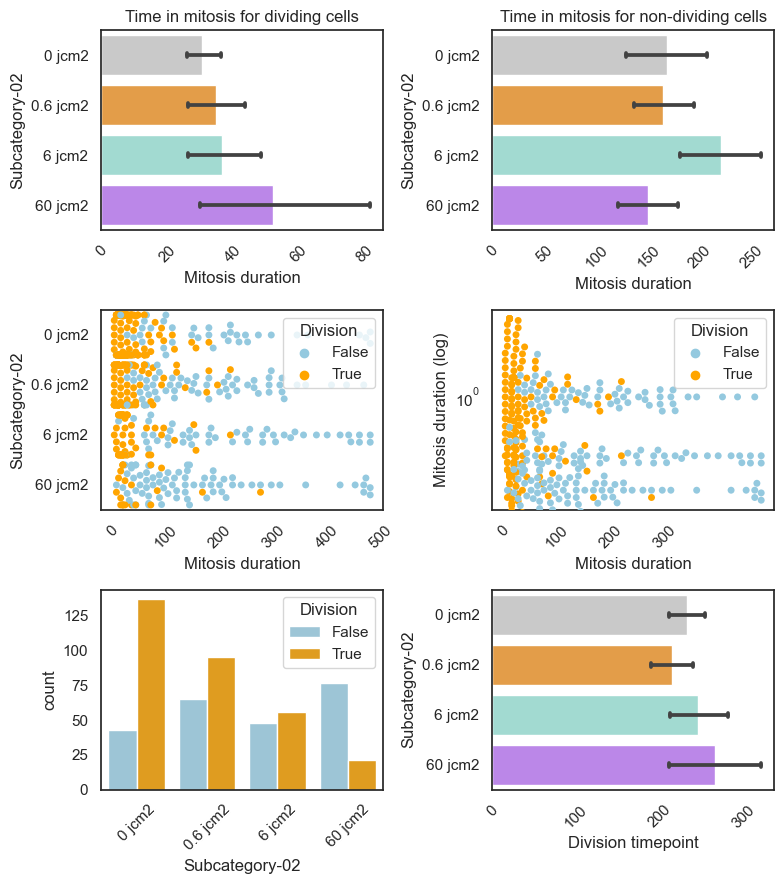

The plot has been saved in:
/Users/esti/Documents/PROYECTOS/PHX/PhotoFiTT/example-data/unsynchro/plots


In [4]:
# Read the stored data if needed
data = pd.read_csv(os.path.join(path2results, "manual_mitosis_counting.csv"))

category_var = "Subcategory-02"
hue_order = ['0 jcm2', '0.6 jcm2', '6 jcm2', '60 jcm2']
## Add other colours if needed for the conditions.
palette_colours = ['#C9C9C9', '#FC9F30', '#99E3D7', '#BC77F8']

display.unsynchro_tracking(data, category_var, os.path.join(path2results, "plots"), hue_order, palette_colours=palette_colours)
print(f"The plot has been saved in:")
print(f"{os.path.join(path2results, 'plots')}")